Epoch [5/60], Loss: 3.9584
Epoch [10/60], Loss: 3.6437
Epoch [15/60], Loss: 3.3552
Epoch [20/60], Loss: 3.0907
Epoch [25/60], Loss: 2.8482
Epoch [30/60], Loss: 2.6258
Epoch [35/60], Loss: 2.4219
Epoch [40/60], Loss: 2.2350
Epoch [45/60], Loss: 2.0636
Epoch [50/60], Loss: 1.9065
Epoch [55/60], Loss: 1.7624
Epoch [60/60], Loss: 1.6302


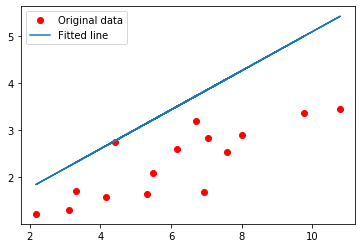

Correctly Saved


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os, random
import numpy as np
import matplotlib.pyplot as plt

from torchvision import transforms, datasets

"""
[주의!]
해당 코드는 수정하지 마세요
"""

##SEED값 고정
SEED = 123
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
    
# Hyper-parameters!!!! 반드시 해당 변수를 사용하셔야합니다
num_epochs = 60
learning_rate = 0.0001
SAVE_FILE_PATH = "model.ckpt" #반드시 해당 파일명으로 모델을 저장해주세요
# End of Hyper-parameters

def isCorrectlySaved():
    flag = True
    testModel = Net()
    try:
        checkpoint = torch.load(SAVE_FILE_PATH)
        testModel.load_state_dict(checkpoint['net']);
        if checkpoint['epoch'] != num_epochs:
            print(checkpoint['epoch'])
            flag = False
    except:
        flag = False
        
    if flag:
        print("Correctly Saved")
    else:
        print("Wrong Implemented!")
    

# Datadset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Linear(1, 1)
    def forward(self, x):
        x = self.classifier(x)
        return x
    
model = Net()

state = {
    'net': model.state_dict(),
    'epoch': num_epochs,
}
"""
[주의!]
상단 코드는 수정하지 마세요
"""


############ 해당 부분 이후부터 구현 진행하시면 됩니다 ###############

# 구현 1 - Loss function (MSE Loss) 정의 및 Adam Optimizer 선언

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

#구현 2 - num_epochs만큼 학습 진행 (5회 간격으로 문제에서 제시한 출력 포맷대로 출력) 및 모델 저장
for epoch in range(num_epochs):
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    
    torch.save(state, SAVE_FILE_PATH)
###################### 구현 부분 끝  ##############################
###################################################################
        
"""
[주의!]
하단 코드는 수정하지 마세요
"""
# 해당 Visualize코드는 테스트용으로 제공됩니다.
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()


isCorrectlySaved() #